# Demonstrating Model Refinement using Synthetic Data

<font size = 3 >
- We'll use a binary classification problem where we generate synthetic data with make_classification from sklearn.<br> 
- We'll evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix, and also apply hyperparameter tuning. 

In [25]:
# Import necessary libraries
import numpy as np   # numpy is a 
import pandas as pd  #
from sklearn.datasets import make_classification  #
from sklearn.model_selection import train_test_split #
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, 
                           n_classes=2, flip_y=0.01, class_sep=1.0, random_state=42)

### The code generates a synthetic dataset where:

- Each sample has 20 features.
- 15 of those features contain useful information for predicting the target, while 5 are redundant.
- The target is binary (0 or 1), and 1% of the labels are randomly flipped to introduce noise.
- The data has a moderate level of class separability.

In [6]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])]) # feature_0 feature_1
df['target'] = y

# Display the first few rows of the synthetic dataset
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-4.906442,3.442789,0.558964,-0.976764,-1.568805,-4.271982,-3.727921,0.111868,2.119795,-2.522812,...,-7.492478,4.264669,0.304866,0.777693,-9.375464,1.654446,3.012859,-4.497003,-2.520066,0
1,2.162610,-5.286651,2.609846,-1.803898,-1.831216,1.450757,2.648709,2.152307,0.524552,0.493548,...,6.680603,-2.431830,2.462773,-1.254824,2.978402,-3.428457,-4.562178,3.698665,-1.923286,1
2,-4.784844,-3.744827,4.657592,-1.408806,-5.444758,-2.416013,3.556495,-1.572119,-0.730549,3.447661,...,7.961059,-5.151105,0.473131,-4.070667,-0.932309,-3.230768,-7.844646,2.803798,-2.963189,1
3,10.465024,1.070944,-3.562432,-0.849062,2.183860,-0.609893,0.946327,-1.046141,-2.057053,-2.056650,...,-1.449095,-1.217685,2.026805,2.121829,3.184256,-1.960146,0.782147,-1.444202,0.915985,0
4,5.599516,-1.776412,-1.304322,-0.720074,5.859373,-3.292432,3.152205,7.099882,-3.321076,3.245486,...,6.608729,5.632297,-1.943748,1.169455,3.782513,-4.752822,-7.577624,4.868025,1.708210,0


In [12]:
# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [20]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.900
Precision: 0.88
Recall: 0.91
F1-score: 0.90


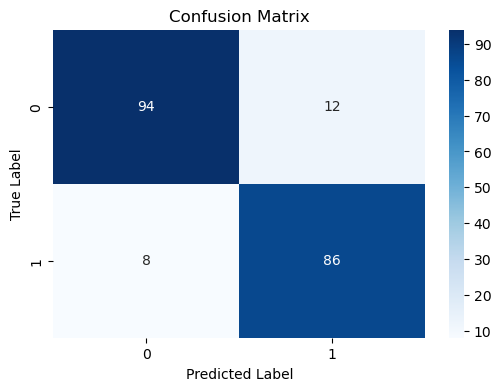

In [23]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
# Train the SVC model
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)


In [27]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.94
Precision: 0.91
Recall: 0.97
F1-score: 0.94


In [33]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 120, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [6, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train Random Forest with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_rf_model.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=120; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total tim

In [34]:
# Evaluate the model with tuned hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Display the improved evaluation metrics
print(f'Improved Accuracy: {accuracy_best:.2f}')
print(f'Improved Precision: {precision_best:.2f}')
print(f'Improved Recall: {recall_best:.2f}')
print(f'Improved F1-score: {f1_best:.2f}')

Improved Accuracy: 0.89
Improved Precision: 0.88
Improved Recall: 0.88
Improved F1-score: 0.88


In [31]:
# Print comparison of evaluation metrics before and after hyperparameter tuning
print(f"Initial Accuracy: {accuracy:.2f}, Tuned Accuracy: {accuracy_best:.2f}")
print(f"Initial Precision: {precision:.2f}, Tuned Precision: {precision_best:.2f}")
print(f"Initial Recall: {recall:.2f}, Tuned Recall: {recall_best:.2f}")
print(f"Initial F1-score: {f1:.2f}, Tuned F1-score: {f1_best:.2f}")


Initial Accuracy: 0.94, Tuned Accuracy: 0.88
Initial Precision: 0.91, Tuned Precision: 0.86
Initial Recall: 0.97, Tuned Recall: 0.88
Initial F1-score: 0.94, Tuned F1-score: 0.87
